In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

In [2]:
def pdf(x, m, s):
    normalizing_constant = 1 / (np.sqrt(2*np.pi*(s**2)))
    p = np.exp(-(((x-m)**2)/(2*s**2)))
    return normalizing_constant * p

def integrand(t, m, s):
    return np.exp(-((t-m)**2)/(2*s**2))

def cdf(x, m, s):
    return np.vectorize(lambda a: quad(pdf, -10, a, args=(m, s))[0])(x)



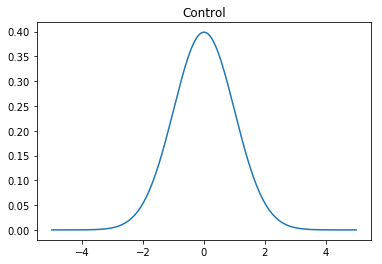

In [3]:
x = np.linspace(-5, 5, 200)
ctrl_m = 0
ctrl_s = 1
ctrl_pdf = pdf(x, ctrl_m, ctrl_s)
plt.plot(x, ctrl_pdf)
plt.title('Control')
plt.show()

In [18]:
max_time = 80
x = np.linspace(0, max_time, max_time*20)
ctrl_m = 8
ctrl_s = 2
ctrl_acc = .99
ctrl_cdf = cdf(x, ctrl_m, ctrl_s)*ctrl_acc
digit_m = 14
digit_s = 3
digit_acc = .975
digit_cdf = cdf(x, digit_m, digit_s)*digit_acc
type_m = 38
type_s = 12
type_acc = .85
type_cdf = cdf(x, type_m, type_s)*type_acc

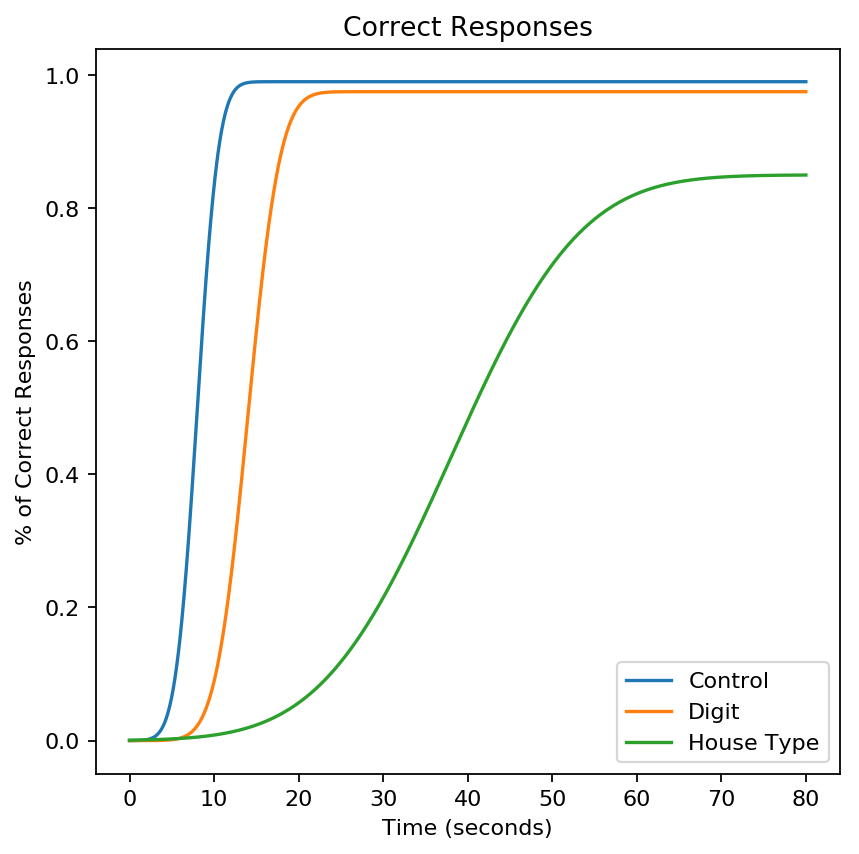

In [19]:
fig = plt.figure(figsize=(6, 6), dpi=160)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, ctrl_cdf, label='Control')
ax.plot(x, digit_cdf, label='Digit')
ax.plot(x, type_cdf, label='House Type')
ax.set_title("Correct Responses")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("% of Correct Responses")
ax.legend()
plt.show()